## Проект: Роботокафе в Москве

В этом проекте предстоит исследовать рынок заведений общественного питания в Москве и подготовить презентацию.

Проект состоит из следующих частей:

- [исследование соотношения видов объектов общественного питания и соотношение сетевых и несетевых заведений по количеству](#first)
- [исследование сетевых заведений и количество посадочных мест в них](#seats)
- [исследование особенностей расположения объектов общественного питания](#district)
- [вывод](#conclusion)



## Импортируем необходимые библиотеки и посмотрим на данные

In [ ]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
rest_data = pd.read_csv('https://code.s3.yandex.net/datasets/rest_data.csv')
rest_data

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
...,...,...,...,...,...,...
15361,208537,Шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50
15362,209264,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10
15363,209186,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20
15364,221900,Шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36


In [ ]:
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


In [ ]:
rest_data.duplicated().sum()

0

Пропущенных значений и дубликатов нет. Типы данных везде устраивают кроме столбца chain. Приведем его к логическомц типу.
Также, в дальнейшем необходимо будет привети названия заведений к одному регистру.

In [ ]:
rest_data['chain'] = [1 if i == 'да' else 0 for i in rest_data['chain']]
rest_data

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,0,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,0,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,0,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,1,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,0,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
...,...,...,...,...,...,...
15361,208537,Шоколадница,1,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50
15362,209264,Шоколадница,1,кафе,"город Москва, улица Земляной Вал, дом 33",10
15363,209186,Шоколадница,1,кафе,"город Москва, улица Земляной Вал, дом 33",20
15364,221900,Шоколадница,1,кафе,"город Москва, поселение Московский, Киевское ш...",36


<a id='first'> </a>

## Исследование соотношения видов объектов общественного питания и соотношение сетевых и несетевых заведений по количеству


### Исследуем соотношение видов объектов общественного питания по количеству.

In [ ]:
group_by_type = rest_data.pivot_table(index='object_type', values='id', aggfunc='count')
group_by_type = group_by_type.reset_index()
group_by_type

,object_type,id
0,бар,856
1,буфет,585
2,закусочная,360
3,кафе,6099
4,кафетерий,398
5,магазин (отдел кулинарии),273
6,предприятие быстрого обслуживания,1923
7,ресторан,2285
8,столовая,2587


In [ ]:
fig = px.bar(group_by_type, x='object_type', y='id', labels={'object_type':'Тип заведения', 'id':'Количество'}, title='Cоотношение видов объектов общественного питания по количеству')

fig.show()

Видим, что в выборке представлено больше всего кафе, за ними в разницей почти в три раза идут столовые, рестораны и предприятия быстрого обслуживания.

### Исследуем соотношение сетевых и несетевых заведений по количеству

In [ ]:
chain_proportion = rest_data.pivot_table(index='chain', values='id', aggfunc='count')
chain_proportion = chain_proportion.reset_index()
chain_proportion

,chain,id
0,0,12398
1,1,2968


In [ ]:
chain_proportion['chain'] = ['Не сетевое' if i == 0 else 'Сетевое' for i in chain_proportion['chain']]
chain_proportion

,chain,id
0,Не сетевое,12398
1,Сетевое,2968


In [ ]:
fig = px.bar(chain_proportion, x='chain', y='id', labels={'chain':'Тип заведения ', 'id':'Количество'}, title='Соотношение сетевых и несетевых заведений по количеству')

fig.show()

Мы видим, что несетвых заведений гораздо больше, что логично.

<a id='seats'> </a>

## Исследование сетевых заведений и количество посадочных мест в них

### Узнаем для какого вида объекта общественного питания характерно сетевое распространение

In [ ]:
chain_proportion = rest_data.pivot_table(index='object_type', values='id', columns='chain', aggfunc='count')
chain_proportion = chain_proportion.reset_index()
chain_proportion

chain,object_type,0,1
0,бар,819,37
1,буфет,574,11
2,закусочная,304,56
3,кафе,4703,1396
4,кафетерий,346,52
5,магазин (отдел кулинарии),195,78
6,предприятие быстрого обслуживания,1132,791
7,ресторан,1741,544
8,столовая,2584,3


In [ ]:
chain_proportion['percentage of chain'] = chain_proportion[1] / (chain_proportion[0] + chain_proportion[1]) * 100
chain_proportion

chain,object_type,0,1,percentage of chain
0,бар,819,37,4.322430
1,буфет,574,11,1.880342
2,закусочная,304,56,15.555556
3,кафе,4703,1396,22.888998
4,кафетерий,346,52,13.065327
5,магазин (отдел кулинарии),195,78,28.571429
6,предприятие быстрого обслуживания,1132,791,41.133645
7,ресторан,1741,544,23.807440
8,столовая,2584,3,0.115964


In [ ]:
fig = px.bar(chain_proportion, x='object_type', y='percentage of chain', labels={'object_type':'Тип заведения ', 'percentage of chain':'Из них процент сетевых'}, title='Процент сетевых заведений по виду объекта')

fig.show()

Видим, что сетевое распространение характерно в большей степени для предприятий быстрого обслуживания. В след за ними идут отделы кулинарии в магазинах и рестораны.

### Узнаем что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест


In [ ]:
rest_data.head()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,0,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,0,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,0,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,1,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,0,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


In [ ]:
rest_data_chain = rest_data[rest_data['chain'] == 1]
rest_data_chain

,id,object_name,chain,object_type,address,number
3,21894,ПИЦЦЕТОРИЯ,1,кафе,"город Москва, Абрамцевская улица, дом 1",40
6,148815,Брусника,1,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10
13,22579,Алло Пицца,1,кафе,"город Москва, улица Авиаторов, дом 14",32
16,144107,Суши Wok,1,предприятие быстрого обслуживания,"город Москва, Азовская улица, дом 3",7
18,58565,Тануки,1,ресторан,"город Москва, Большая Академическая улица, дом 65",160
...,...,...,...,...,...,...
15361,208537,Шоколадница,1,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50
15362,209264,Шоколадница,1,кафе,"город Москва, улица Земляной Вал, дом 33",10
15363,209186,Шоколадница,1,кафе,"город Москва, улица Земляной Вал, дом 33",20
15364,221900,Шоколадница,1,кафе,"город Москва, поселение Московский, Киевское ш...",36


In [ ]:
l = list(rest_data_chain['object_name'])

In [ ]:
rest_data_chain['object_name'] = rest_data_chain['object_name'].str.lower()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
import re

pattern = "кулинарное бюро|пироговая|«|»|кальян|кофейня|ресторан|-|сеть магазинов|блинная|пбо|lounge|каффе|спорт|японской кухни|закусочная|кальянная|кафе|бар|ресторан быстрого питания|семейное|пиццерия|мороженного|суши|кондитерская|точка продажи готовой еды|предприятие быстрого обслуживания|кафе быстрого питания"


for i in range(len(l)):
  l[i] = re.sub(pattern, "", l[i]).strip()

rest_data_chain['object_name'] = l

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
chain_pivot = rest_data_chain.pivot_table(index='object_name', values = 'number', aggfunc = ['count', 'sum', 'mean'])
chain_pivot = chain_pivot.reset_index()
chain_pivot.columns=['object_name', 'count', 'sum', 'mean']
chain_pivot

,object_name,count,sum,mean
0,Beverly Hills Diner,1,88,88.000000
1,Bierloga,1,75,75.000000
2,Black & White,1,40,40.000000
3,Bocconcino,3,200,66.666667
4,BooBo,1,46,46.000000
...,...,...,...,...
688,Якитория,34,3648,107.294118
689,Якитория и Ян Примус,1,282,282.000000
690,Ян Примус,1,300,300.000000
691,Японский ВабиСаби,1,155,155.000000


In [ ]:
fig = px.scatter(chain_pivot, x="count", y="mean", labels={'count':'Количество заведений сети ', 'mean':'Среднее количество посадочных мест'}, title='Соотношение количества заведений сети и посадочных мест')
fig.show()

Можем сделать вывод, что разброс кол-ва посадочных мест для сетей с небольшим количеством заведений (менее 20) гораздо выше чем для сетей с более чем 20 заведениями. Но видим, что в сетевых заведениях в которых более 10 объектов, число посадочных мест не превышает 150.

### Для каждого вида объекта общественного питания опишем среднее количество посадочных мест

In [ ]:
group_by_seats = rest_data.pivot_table(index='object_type', values='number', aggfunc='mean')
group_by_seats = group_by_seats.reset_index()
group_by_seats

,object_type,number
0,бар,43.494159
1,буфет,51.129915
2,закусочная,7.608333
3,кафе,39.716019
4,кафетерий,9.123116
5,магазин (отдел кулинарии),5.589744
6,предприятие быстрого обслуживания,20.552262
7,ресторан,96.834136
8,столовая,130.246618


In [ ]:
fig = px.bar(group_by_seats, x='object_type', y='number', labels={'object_type':'Тип заведения', 'number':'Количество'}, title='Cоотношение видов объектов общественного питания по среднему числу посадочных мест')

fig.show()

Видим, что наибольшее количество посадочных мест в столовых и ресторанах. Меньше всего – отделах кулинарии магазинов, закусочных и кафетериях.

<a id='district'> </a>

## Исследование особенностей расположения объектов общественного питания

Выделим в отдельный столбец информацию об улице из столбца address

In [ ]:
rest_data['address'] = rest_data['address'].apply(lambda x: x.split(',')[1])

Найдем топ-10 улиц по количеству заведений.

In [ ]:
top_str = rest_data.pivot_table(index='address', values='id', aggfunc='count')
top_str = top_str.reset_index()
top_str = top_str.sort_values(by='id', ascending=False)
top_str[:10]

,address,id
1334,город Зеленоград,232
1452,проспект Мира,204
993,Профсоюзная улица,182
683,Ленинградский проспект,171
979,Пресненская набережная,167
407,Варшавское шоссе,161
686,Ленинский проспект,147
1419,поселение Сосенское,138
1449,проспект Вернадского,132
674,Кутузовский проспект,114


In [ ]:
top_str = top_str[~((top_str['address'].str.contains("город"))|(top_str['address'].str.contains("поселение"))) ]
top_str10 = top_str[:10]

In [ ]:
fig = px.bar(top_str[:10], x='address', y='id', labels={'address':'Улица', 'id':'Количество'}, title='Топ-10 улиц по кол-ву объектов общественного питания')

fig.show()

Для того чтобы узнать в каких районах находятся эти улицы, подгрузим выгрузку из геокодера по адресам.

In [ ]:
coordinates_top = pd.read_csv('https://raw.githubusercontent.com/LinaKova/test/main/district.csv')

In [ ]:
coordinates_top['district'] = coordinates_top['district'].apply(lambda x: x.split(',')[2])
coordinates_top

,Unnamed: 0,id,address,coord,district
0,151,155973,"город Москва, Варшавское шоссе, дом 2",37.619683 55.699943,Южный административный округ
1,152,23618,"город Москва, Варшавское шоссе, дом 7, корпус 1",37.622405 55.700877,Южный административный округ
2,153,155852,"город Москва, Варшавское шоссе, дом 29",37.622792 55.693074,Южный административный округ
3,154,152556,"город Москва, Варшавское шоссе, дом 72, корпус 2",37.618767 55.656839,Южный административный округ
4,155,120658,"город Москва, Варшавское шоссе, дом 100",37.618812 55.646228,Южный административный округ
...,...,...,...,...,...
1497,15308,213629,"город Москва, Пресненская набережная, дом 12",37.537083 55.749511,Центральный административный округ
1498,15325,198436,"город Москва, Ленинградский проспект, дом 80, ...",37.511508 55.807951,Северный административный округ
1499,15347,222491,"город Москва, Профсоюзная улица, дом 142, корп...",37.509334 55.625481,Юго-Западный административный округ
1500,15350,213061,"город Москва, Каширское шоссе, дом 96, корпус 1",37.7123 55.614922,Южный административный округ


In [ ]:
coordinates_top_pivot = coordinates_top.pivot_table(index='district', values='id', aggfunc='count')
coordinates_top_pivot = coordinates_top_pivot.reset_index()
coordinates_top_pivot = coordinates_top_pivot.sort_values(by='id', ascending=False)
coordinates_top_pivot

,district,id
5,Южный административный округ,396
4,Юго-Западный административный округ,285
3,Центральный административный округ,255
0,Западный административный округ,254
1,Северный административный округ,171
2,Северо-Восточный административный округ,141


In [ ]:
coordinates_top_pivot['district'] = coordinates_top_pivot['district'].apply(lambda x: x.split(' ')[1])
coordinates_top_pivot

,district,id
5,Южный,396
4,Юго-Западный,285
3,Центральный,255
0,Западный,254
1,Северный,171
2,Северо-Восточный,141


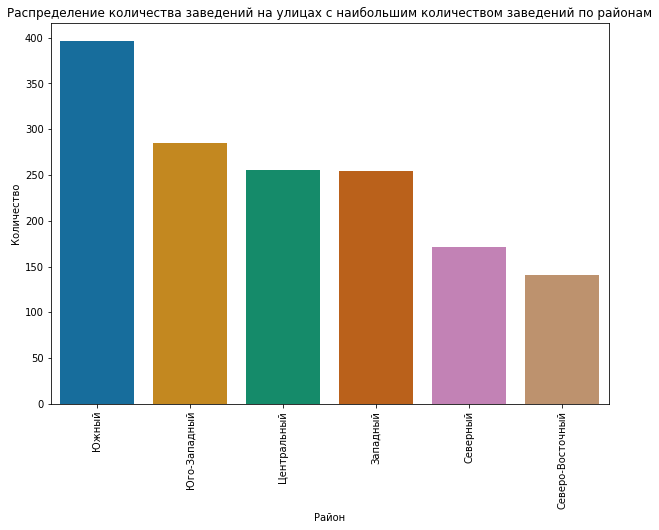

In [ ]:
plt.figure(figsize=(10,7))
g= sns.barplot(data=coordinates_top_pivot, x='district', y='id', palette='colorblind')
plt.ylabel('Количество')
plt.xlabel('Район')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title('Распределение количества заведений на улицах с наибольшим количеством заведений по районам');

Видим, что наибольшее число улиц с большим количеством заведений находится в Южном районе, а вот Северо-Восточный пользуется наименьшей популярностью.

### Найдем число улиц с одним объектом общественного питания и узнаем в каких районах Москвы они находятся.


In [ ]:
one_object_streets = top_str[top_str['id'] == 1]
one_object_streets

,address,id
1586,улица Демьяна Бедного,1
259,Андреево-Забелинская улица,1
35,1-й Саратовский проезд,1
260,Андроньевская площадь,1
113,2-й Стрелецкий проезд,1
...,...,...
1343,дом 1,1
1345,дом 10,1
1346,дом 11,1
1347,дом 118Б,1


In [ ]:
one_object_streets = one_object_streets[~((one_object_streets['address'].str.contains("дом"))|\
                                          (one_object_streets['address'].str.contains("деревня"))|\
                                          (one_object_streets['address'].str.contains("владение"))|\
                                          (one_object_streets['address'].str.contains("посёлок")))]
one_object_streets

,address,id
1586,улица Демьяна Бедного,1
259,Андреево-Забелинская улица,1
35,1-й Саратовский проезд,1
260,Андроньевская площадь,1
113,2-й Стрелецкий проезд,1
...,...,...
529,Есенинский бульвар,1
524,Елоховский проезд,1
522,Егорьевский проезд,1
505,Докучаев переулок,1


Для того чтобы определить район, нам снова понадобится выгрузка из геокодера.

In [ ]:
coordinates_one = pd.read_csv('https://raw.githubusercontent.com/LinaKova/test/main/district_1.csv')
coordinates_one = coordinates_one.dropna()
coordinates_one = coordinates_one.reset_index(drop=True)
del coordinates_one['Unnamed: 0']

In [ ]:
coordinates_one['district'] = coordinates_one['district'].apply(lambda x: x.split(',')[2])
coordinates_one

,id,address,coord,district
0,153644,"город Москва, Филипповский переулок, дом 15/5",37.598573 55.75058,Центральный административный округ
1,21214,"город Москва, Бабаевская улица, дом 3",37.689069 55.790595,Восточный административный округ
2,22139,"город Москва, 1-й Балтийский переулок, дом 3/25",37.518785 55.810471,Северный административный округ
3,25833,"город Москва, улица Демьяна Бедного, дом 4",37.48693 55.770401,Северо-Западный административный округ
4,150881,"город Москва, Будайская улица, дом 3",37.665156 55.831903,Северо-Восточный административный округ
...,...,...,...,...
552,213535,"город Москва, 1-й Силикатный проезд, дом 13",37.510439 55.767863,Северо-Западный административный округ
553,208805,"город Москва, 3-й Угрешский проезд, дом 8, стр...",37.699822 55.712315,Юго-Восточный административный округ
554,211368,"город Москва, улица Линии Октябрьской Железной...",37.572082 55.838819,Северный административный округ
555,214324,"город Москва, 2-й Кадашёвский переулок, дом 16...",37.621902 55.743745,Центральный административный округ


In [ ]:
coordinates_one_pivot = coordinates_one.pivot_table(index='district', values='id', aggfunc='count')
coordinates_one_pivot = coordinates_one_pivot.reset_index()
coordinates_one_pivot = coordinates_one_pivot.sort_values(by='id', ascending=False)
coordinates_one_pivot

,district,id
6,Центральный административный округ,182
0,Восточный административный округ,66
4,Северо-Восточный административный округ,64
7,Юго-Восточный административный округ,55
3,Северный административный округ,54
1,Западный административный округ,43
5,Северо-Западный административный округ,29
9,Южный административный округ,29
8,Юго-Западный административный округ,28
2,Промышленный район,1


In [ ]:
coordinates_one_pivot = coordinates_one_pivot[~((coordinates_one_pivot['district'].str.contains("поселение"))|\
                                          (coordinates_one_pivot['district'].str.contains("посёлок")))]

In [ ]:
coordinates_one_pivot['district'] = coordinates_one_pivot['district'].apply(lambda x: x.split(' ')[1])
coordinates_one_pivot

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,district,id
6,Центральный,182
0,Восточный,66
4,Северо-Восточный,64
7,Юго-Восточный,55
3,Северный,54
1,Западный,43
5,Северо-Западный,29
9,Южный,29
8,Юго-Западный,28
2,Промышленный,1


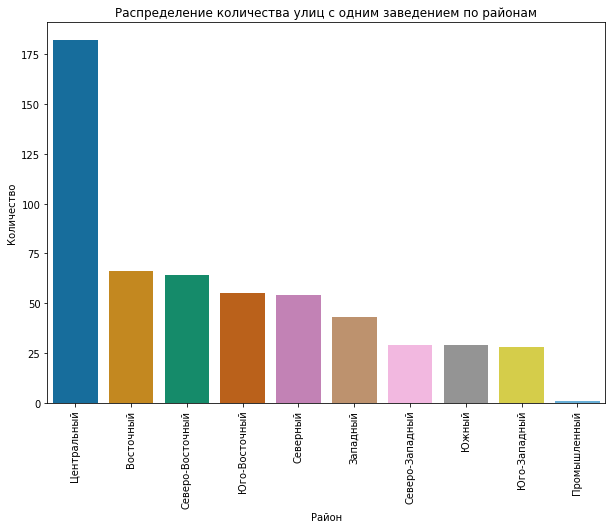

In [ ]:
plt.figure(figsize=(10,7))
g= sns.barplot(data=coordinates_one_pivot, x='district', y='id', palette='colorblind')
plt.ylabel('Количество')
plt.xlabel('Район')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title('Распределение количества улиц с одним заведением по районам');

Видим, что центральный район – лидер по количеству улиц с одним заведением. Скорее всего причина в том, что в центральном районе много улиц (1194), а в Южном всего 347.

### Посмотрим на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания

In [ ]:
top_str = top_str.reset_index(drop=True)

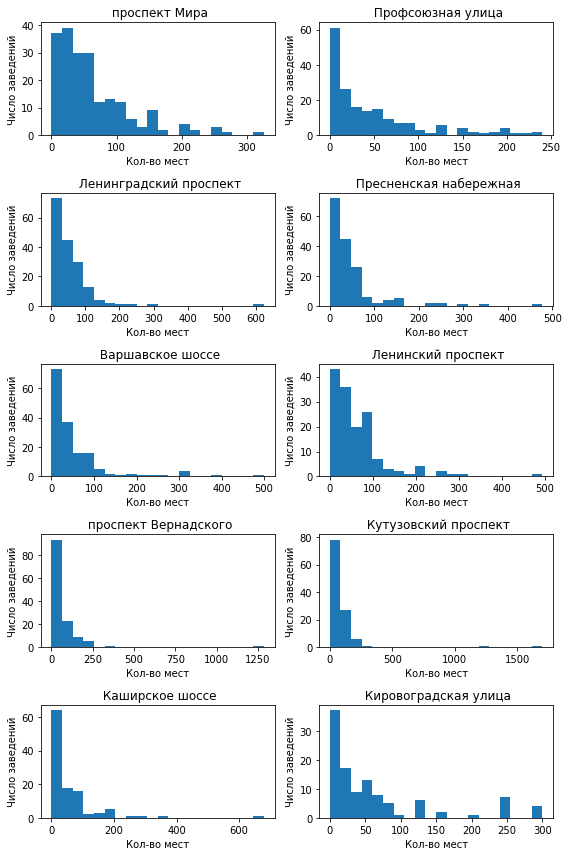

In [ ]:
plt.figure(figsize=(8,12))
for i in range(10):
   plt.subplot(5, 2, i+1)
   plt.hist(rest_data[rest_data['address'].str.contains(top_str.loc[i, 'address'])]['number'], bins = 20)
   plt.title(top_str.loc[i, 'address'])
   plt.xlabel("Кол-во мест")
   plt.ylabel("Число заведений")
   plt.tight_layout()


In [ ]:
table = rest_data.merge(coordinates_top, how = 'right', on  ='id')
px.histogram(table[table['number'] < 300], x = 'number', labels={'number':'Число посадочных мест', 'count':'Количество заведений'}, title='Распределение количества посадочных мест для улиц с большим количеством объектов общественного питания')

Видим, что в большинстве заведений количество посадочных мест не превышает 50. Также, в выборке есть "гиганты" с проспекта Вернадского и Кутузовского. Там число посадочных мест больше 1000.

Дорогой ревьюер, не пойму как сделать название для оси Y.

<a id='conclusion'> </a>

## Общий вывод:

Мы узнали, что в Москве по количеству заведений лидируют кафе, за ними в разницей почти в три раза идут столовые, рестораны и предприятия быстрого обслуживания. Несетевых заведений гораздо больше сетевых, среди которых лидируют предприятия быстрого обслуживания. 

Разброс кол-ва посадочных мест для сетей с небольшим количеством заведений (менее 20) гораздо выше чем для сетей с более чем 20 заведениями. Но видим, что в сетевых заведениях в которых более 10 объектов, число посадочных мест не превышает 150. Но и большинство сетей с меньшим количеством заведений также не превышают этого порога. Наибольшее число посадочных мест – в столовых и ресторанах, наименьшее – в отделах кулинарии магазинов, закусочных и кафетериях.

Наибольшее число улиц с большим количеством заведений находится в Южном районе, а вот Северо-Восточный пользуется наименьшей популярностью. А вот Центральный район – лидер по количеству улиц с одним заведением. Скорее всего это связано с количеством улиц в районе. Например, в центральном районе много улиц (1194), а в Южном всего 347.

В большинстве заведений количество посадочных мест не превышает 50. Также, в выборке есть "гиганты" с проспекта Вернадского и Кутузовского. Там число посадочных мест больше 1000.

Я бы не советовала открывать заведение с большим количеством посадочных мест, так как реакция потребителя нам неизвестна. На мой взгляд, самый объективный вариант – открыть кафе с количеством посадочных мест не больше 150 в Центральном районе, так как проходимость там должна быть выше, чем в Южном. 
Предположу, что для оценки возможности развития сети нужно сначала открыть одно заведение, оценить его работу и наладить процессы. Также, будет полезным более детально изучить и анализировать информацию о потенциальных сетевых конкурентах.

[Презентация 1](https://docs.google.com/presentation/d/1YwQjpmzRwatGW9cw_yWv19BpkeFwUNW2BXUfrVaVBFk/edit?usp=sharing)

[Презентация 2](https://youtu.be/dQw4w9WgXcQ)